In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [44]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

/home/artshar/anaconda3/envs/GeekbrainsJupiter/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

/home/artshar/anaconda3/envs/GeekbrainsJupiter/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


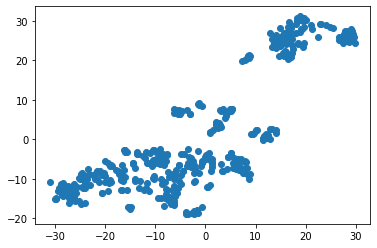

In [60]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

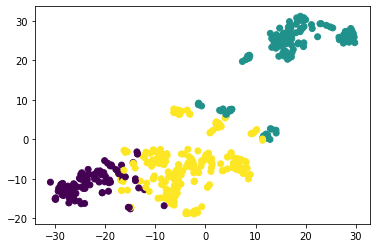

In [41]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,max_iter=100,random_state=42)

labels_train = model.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [75]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Price: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Price: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))
print('Price: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0: 0.07356558139534884
Price: price    27.788372
dtype: float64
Кластер 1: 10.797028425196851
Price: price    16.165354
dtype: float64
Кластер 2: 0.4216602094240837
Price: price    24.958115
dtype: float64


In [76]:
labels_test = model.predict(X_test_scaled)
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Price: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Price: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))
print('Price: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0: 0.06206
Price: price    31.35
dtype: float64
Кластер 1: 10.165531142857143
Price: price    16.437143
dtype: float64
Кластер 2: 0.2660788235294118
Price: price    21.860784
dtype: float64
